# Week 5 Assignment - EDA

**Brian Roepke**  
**DATA 110**  
**February 14, 2021**  

EDA (exploratory data analysis). 
 
**The Iris Dataset:**
> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.


https://en.wikipedia.org/wiki/Iris_flower_data_set

![Iris Species](iris.png)

## A: Data Import and Description
Load the dataset and describe the data:

 * Dimensions of the dataset
 * Peek at the data itself (eg: pandas head/tail)
 * Statistical summary of all attributes
 * Breakdown of the data by the class variable (eg: by Lily type)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("irisdata.csv")

### Dimensions

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Info:** `150` total observations across `5` columns.  `4` column data types are `floating-point` numbers and one as an `object` type.

### Numerical Data

In [5]:
# get numerical data only
numeric_data = df.select_dtypes(include=['float'])

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Numerical Data:**  
There are `4` numerical columns. `sepal-lenth`, `sepal-width`, `petal-length`, and `petal-width`.

### Categorical Data

In [6]:
# Change the ojbect type to a category type
df['species'] = df.species.astype('category')

# get categorical data
cat_data = df.select_dtypes(include=['category'])

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   species  150 non-null    category
dtypes: category(1)
memory usage: 410.0 bytes


**Categorical Data:**  
There is one categorical column named `species`.

In [7]:
df['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [8]:
# show counts values of each categorical variable
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64 



**Species:** There are `3` different Species in this dataset, each having `50` observations. Iris-virginica, Iris-setosa, Iris-versicolor

### Check for Null Values

In [9]:
# check for nan/null
df.isnull().values.any()

False

In [10]:
# count of nulls
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

**Note:** There are no NULL values in this dataset 

### Remove Duplicates

In [11]:
# drop duplicates
len(df.drop_duplicates())

147

In [12]:
df.shape

(150, 5)

**Note:** There were 3 duplicates in this dataset, however they will remain because they represent distinct observations/measurements of a species.  

### Show Head and Tail

In [13]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Statistical Summary of all Attributes

Including a Breakdown of the data by the class variable (eg: by Lily type)

In [15]:
df.describe().round(3)

,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


**Observations:**
 * `Sepal-Length` has the largest `max` value at `7.9` as well as the largest `mean` at `5.843`.
 * `Petal-Width` is the smallest value in our dataset, with the `min` at `0.1` and the smallest mean at `1.199`. 
 * All `Width` values in all cases are smaller than the `Length` values.
 * `Petal-Width` also has the most variance relative to its mean at `0.763^2`.

In [16]:
#statistical summary by class variable (use round to suppress scientif notation as needed)
print("Statistics by Species")

species = df.groupby('species').describe().round(3)

# transposed index and columns for long format (easier to view) vs wide
species.transpose() 

Statistics by Species


species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal-length count       50.000           50.000          50.000
             mean         5.006            5.936           6.588
             std          0.352            0.516           0.636
             min          4.300            4.900           4.900
             25%          4.800            5.600           6.225
             50%          5.000            5.900           6.500
             75%          5.200            6.300           6.900
             max          5.800            7.000           7.900
sepal-width  count       50.000           50.000          50.000
             mean         3.418            2.770           2.974
             std          0.381            0.314           0.322
             min          2.300            2.000           2.200
             25%          3.125            2.525           2.800
             50%          3.400            2.800           3.000
             75%          3.675            3.000           3.175
             max          4.400            3.400           3.800
petal-length count       50.000           50.000          50.000
             mean         1.464            4.260           5.552
             std          0.174            0.470           0.552
             min          1.000            3.000           4.500
             25%          1.400            4.000           5.100
             50%          1.500            4.350           5.550
             75%          1.575            4.600           5.875
             max          1.900            5.100           6.900
petal-width  count       50.000           50.000          50.000
             mean         0.244            1.326           2.026
             std          0.107            0.198           0.275
             min          0.100            1.000           1.400
             25%          0.200            1.200           1.800
             50%          0.200            1.300           2.000
             75%          0.300            1.500           2.300
             max          0.600            1.800           2.500

**Observations:**
 * There are `50` observations for each species.
 * `Iris-Virginica` appears to be the largest regarding both `Petal-Length` and `Sepal-Length` for `mean` and `max` values.
 * `Iris-Setosa` is the smallest overall in both `Petal-Length` and `Sepal-Length.`  It's also the smallest overall for `Petal-Width.`
 * `Iris-Versicolor` appears to be sized between the other two species except for its `Sepal-Width,` which is the smallest overall for both `min` and `max` values.
 
**Note:** These differences will be easier to see in visualizations.

## B: Data Visualization
Visualize the data: Univariate refers to a single variable while Multivariate refers to multiple variables.
 * Univariate plots - sepal-length, sepal-width, petal-length, petal-width
 * Histograms
 * Multivariate plots

## Univariate Plots

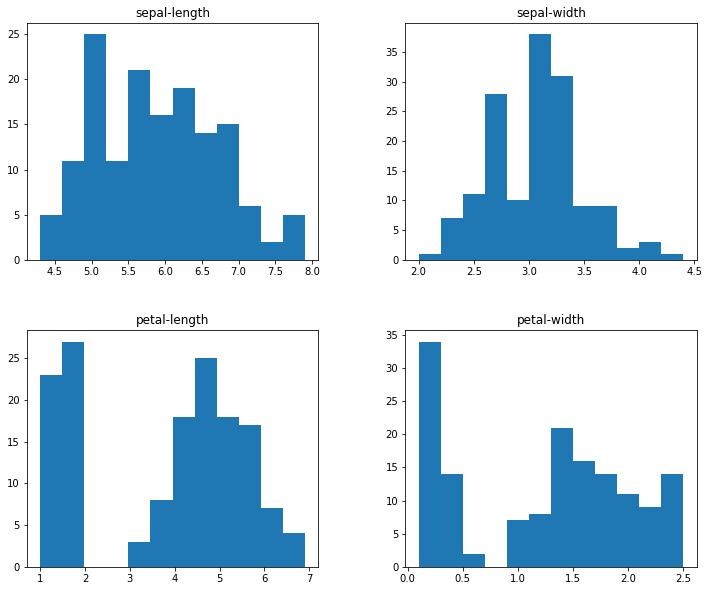

In [17]:
df.hist(figsize=(12,10), grid=False, bins=12, sharex=False);

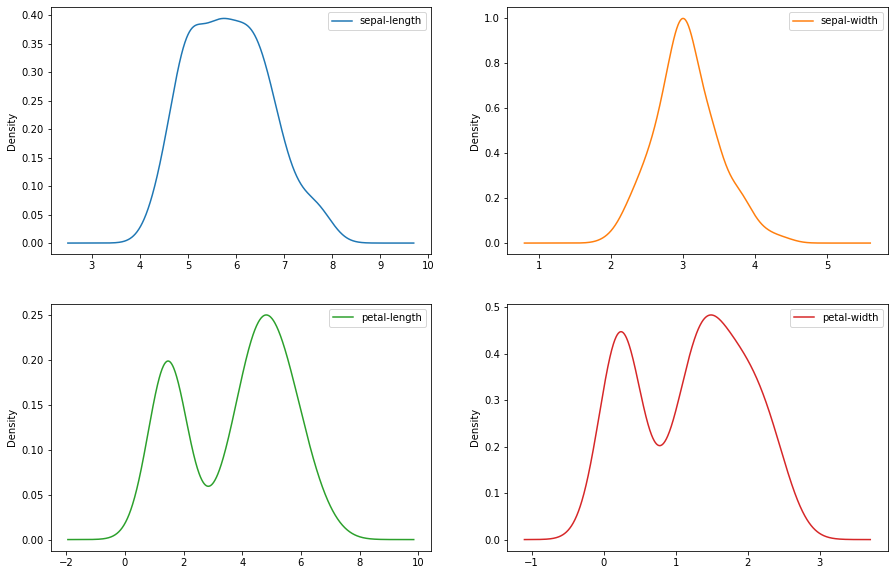

In [18]:
df.plot(figsize=(15,10), kind='density', subplots=True, layout=(2,2), sharex=False);

**Histogram and Density plot Observations:**  
 * `Sepal-Length` and `Sepal-Width` are approximately normally distributed.  
 * `Sepal-Length` has a larger standard deviation and variance than `Sepal-Width.`
 * `Petal-Length` and `Sepal-Length` both show a bimodal shape, with two peaks.

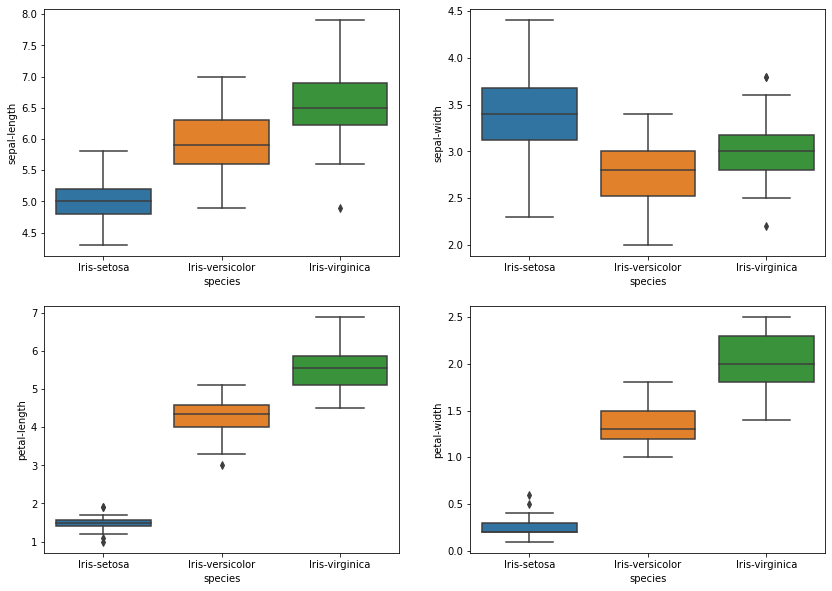

In [19]:
# using seaborn library, plot each individually
fig, axes = plt.subplots(2, 2, figsize=(14,10))

ax = sns.boxplot(x="species", y="sepal-length", data=df, ax=axes[0, 0])
ax = sns.boxplot(x="species", y="sepal-width", data=df, ax=axes[0, 1])
ax = sns.boxplot(x="species", y="petal-length", data=df, ax=axes[1, 0])
ax = sns.boxplot(x="species", y="petal-width", data=df, ax=axes[1, 1])

**Box and Whiskers Plots:**  
 - **Sepal-Length**: Each species from Setosa to Versicolor, to Virginica, get increasingly larger in Sepal Length on all dimensions of `Min,` `Max` and `Median.`  
 - **Sepal-Width**: The box plots here show a different pattern.  The Setosa species has the largest `max` and `median` of any of the species.   
 - **Petal-Length**: Similar to Sepal length, each species from Setosa, to Versicolor to Virginica get increasingly larger in Peta Length on all dimension of `Min,` `Max` and `Median.` There also is a much smaller `inner-quartile` range for the Setosa species relative to the others, showing that there isn't a lot of variance in the sizes.   
 - **Petal-Width**: Petal width also increases with each species, but we can see a much smaller `inner-quartile` percentage and min and max for the Setosa species.  

## Multivariate Plots

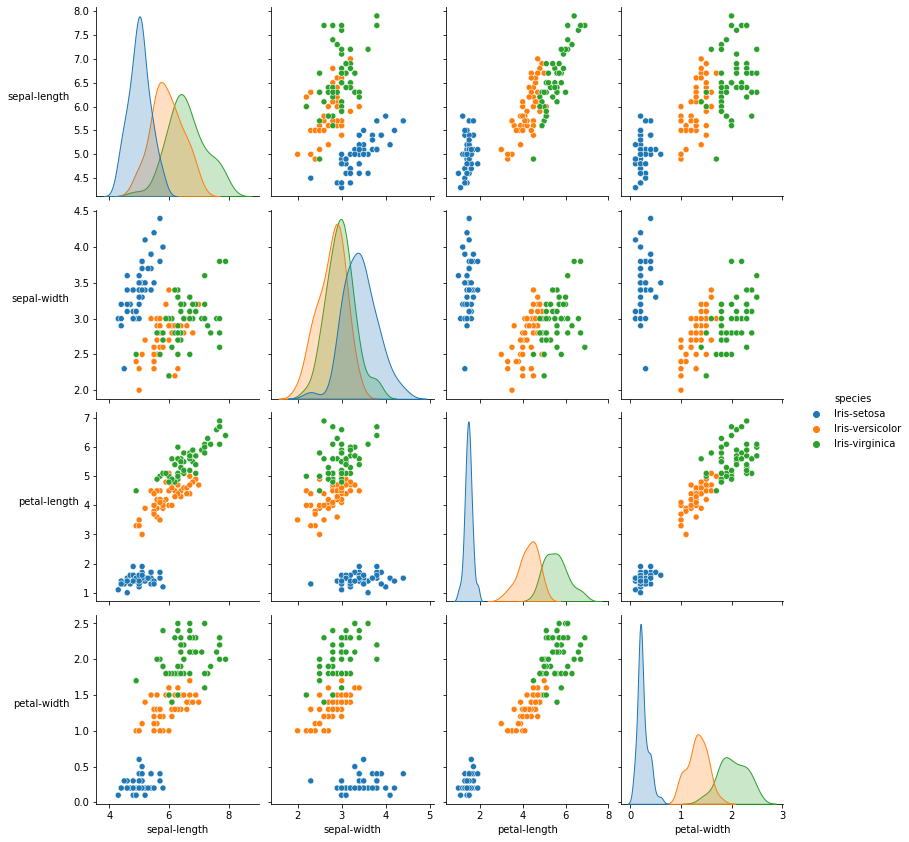

In [20]:
# Using seaborn, pairwise plot by income

g=sns.pairplot(df, diag_kind = 'auto', hue='species')
g.fig.set_size_inches(12,12);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

**Observations**
 - **Density Plots**: Across the diagonals, we have density plots overlaid on each other by species. We can see that the setosa is the smallest (furthest left), and virginica is the largest for all but sepal-width.  With sepal-width that changes and setosa are the largest.  
 - **Distinct Groupings**: In all other scatterplots, there appear to be two distinct, separable groupings.   The grouping is shown in blue as the Setosa species and the mixed grouping of Versicolor and Virginia.  Since the data is labeled with species, it's possible to see the differences between those latter two species. However, it would not be discernible without that labeling. 
 - **Highly Correlated Variables**: There appears to be a strong linear relationship between variables in some cases. The strongest appears to be `petal-lenght` vs. `petal-width.`  The relationship between `petal-length` and `sepal-lenght` also appears to be slightly correlated, but not as strongly. 
 
**Next**: Calculate the actual correlations between variables. 

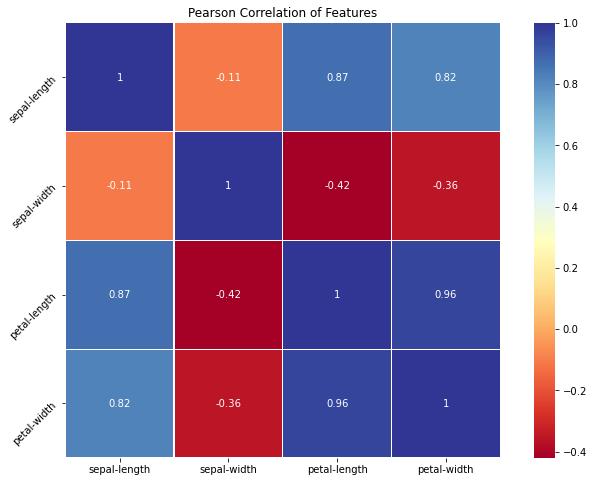

In [23]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="RdYlBu", annot=True, square=True, ax=ax,  linewidth = 0.1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

**Correlation Observations:**
 - `Petal-Length` & `Petal-Width` have the strongest correlation at `0.96`
 - `Petal-Length` & `Sepal-Length` has the next strongest correlation `at 0.87` - This relationship was observed above and validated here.
 - There are slight negative correlations between `Sepal-Width` and `Petal-Length`, but it's not as strong with a value of `-0.42`